In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_5_20230330/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_corr = data.corr()

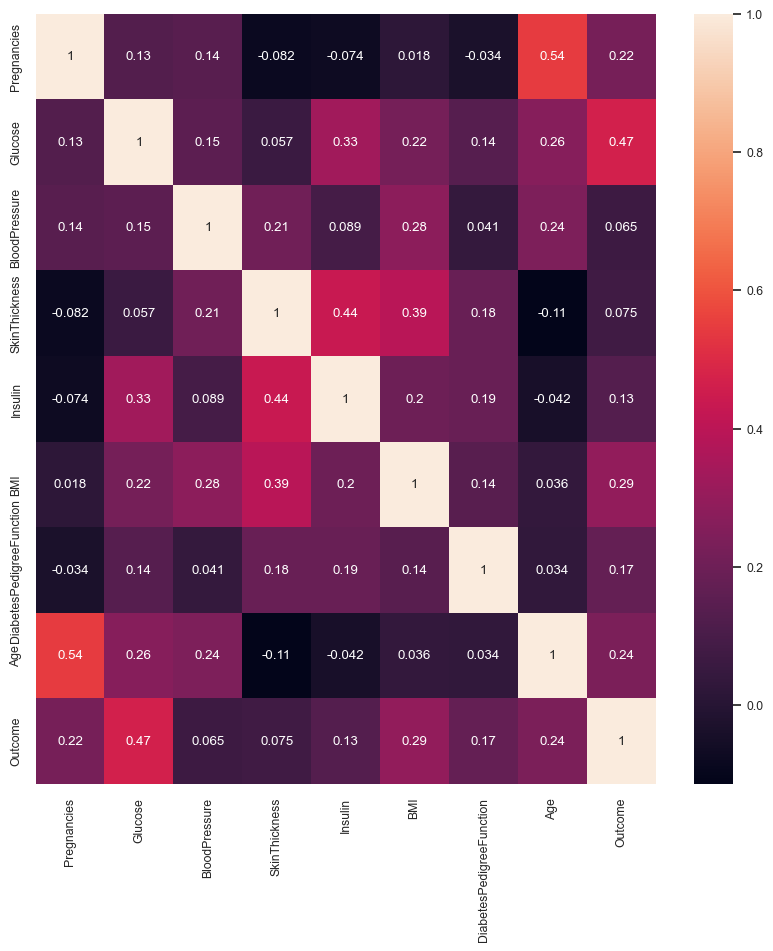

In [4]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = True)
plt.show()

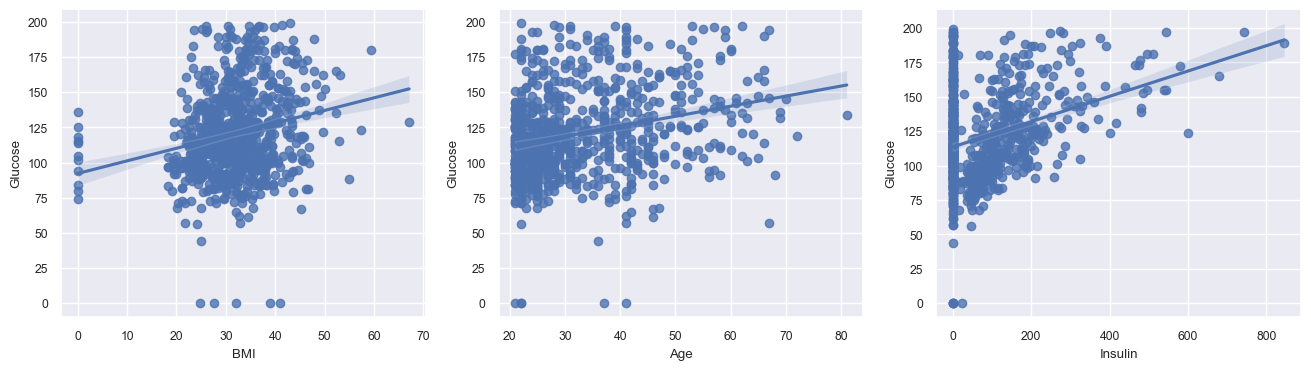

In [5]:
# 2x4 subplot 이용. axs는 4x2 
fig, axs = plt.subplots(figsize=(16,4), ncols=3, nrows=1)

lm_features = ['BMI','Age','Insulin']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    # 2행
    col = i
    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Glucose', data=data, ax=axs[col])

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Label')

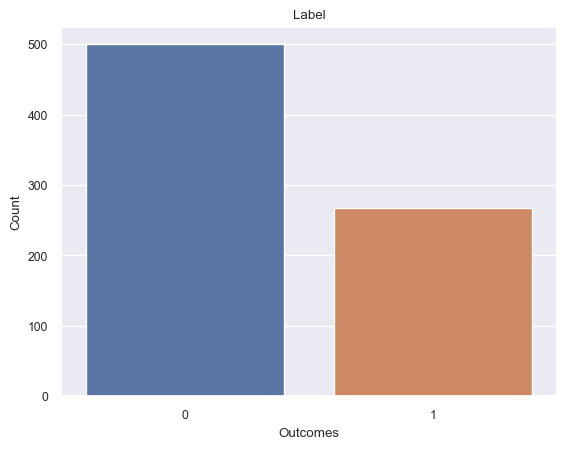

In [7]:
sns.countplot(data = data, x="Outcome")
plt.xlabel("Outcomes")
plt.ylabel("Count")
plt.title("Label")

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

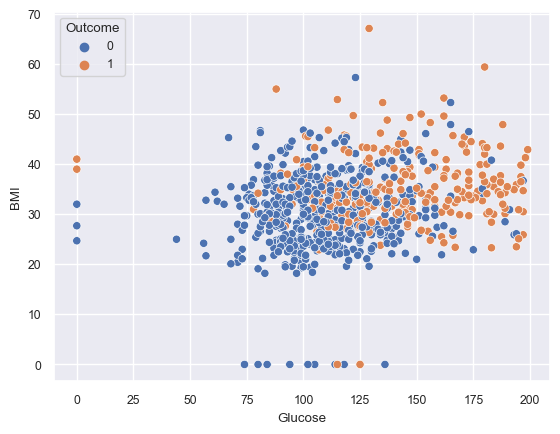

In [8]:
sns.scatterplot(x='Glucose', y = 'BMI', data = data, hue = data['Outcome'])

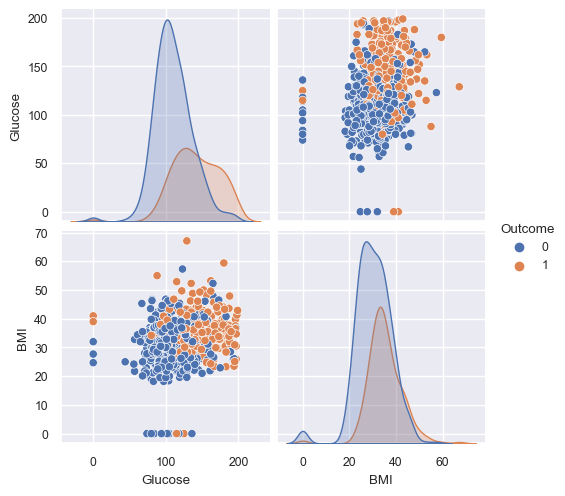

In [9]:
sns.pairplot(data,
             vars=['Glucose','BMI'],
            hue ='Outcome')
plt.show()

In [10]:
X_data = data[['Glucose','BMI','Age']]
y_data = data['Outcome']

In [11]:
X_data.head()

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33


In [12]:
X_train, X_test, y_train, y_test  = train_test_split(X_data, y_data, test_size = 0.2, stratify= y_data )

In [13]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (614, 3)
y_train.shape : (614,)
X_test.shape: (154, 3)
y_test.shape: (154,)


In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS



--- SVM Classifier ---
0.7532467532467533
[[91  9]
 [29 25]]


<AxesSubplot:>

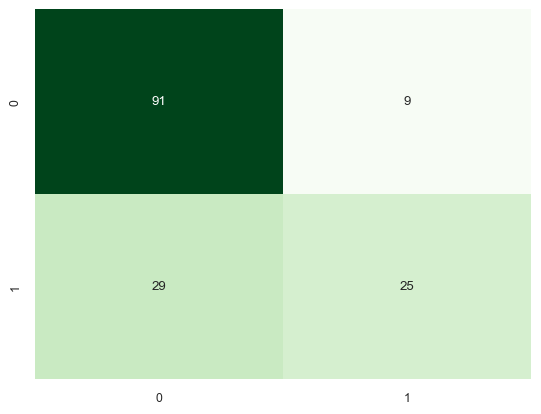

In [17]:
clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

pred_svm = clf_svm.predict(test_scaled)
cm_svm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")


--- Logistic Regression Classifier ---
0.7727272727272727
[[90 10]
 [25 29]]


<AxesSubplot:>

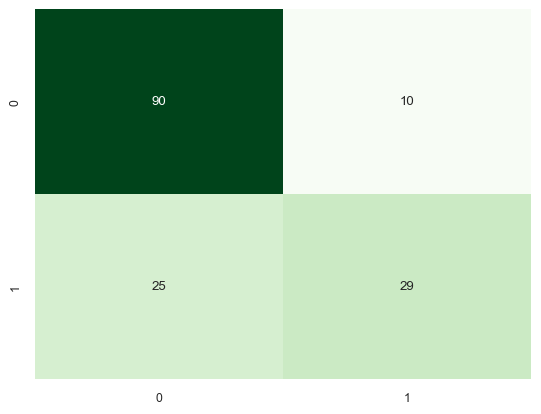

In [18]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, y_train)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

pred_lr = clf_lr.predict(test_scaled)
cm_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")


--- Neural Network Classifier ---
0.7727272727272727
[[90 10]
 [25 29]]


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<AxesSubplot:>

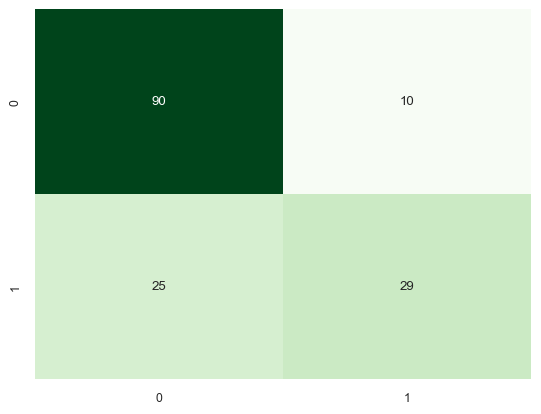

In [19]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(train_scaled, y_train)

pred_nn = clf_nn.predict(test_scaled)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

pred_nn = clf_nn.predict(test_scaled)
cm_nn = confusion_matrix(y_test, pred_nn)
sns.heatmap(cm_nn,cbar=False,annot=True,cmap="Greens",fmt="d")


--- Radom Forest ---
0.7207792207792207
[[85 15]
 [28 26]]


<AxesSubplot:>

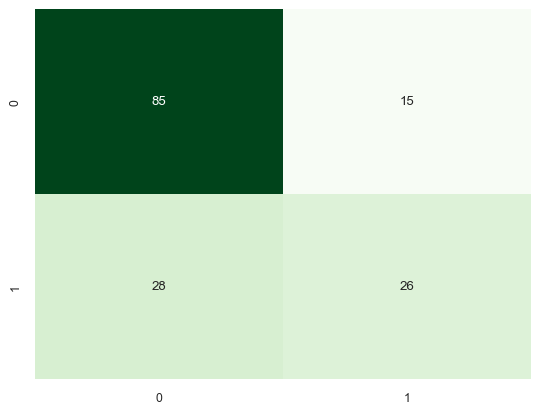

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, y_train)

pred_rf = rf_clf.predict(test_scaled)
print(accuracy_score(y_test,pred_rf))
print (confusion_matrix(y_test, pred_rf))

cm_rm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm_rm,cbar=False,annot=True,cmap="Greens",fmt="d")


--- DecisionTreeClassifier ---
0.6948051948051948
[[77 23]
 [24 30]]


<AxesSubplot:>

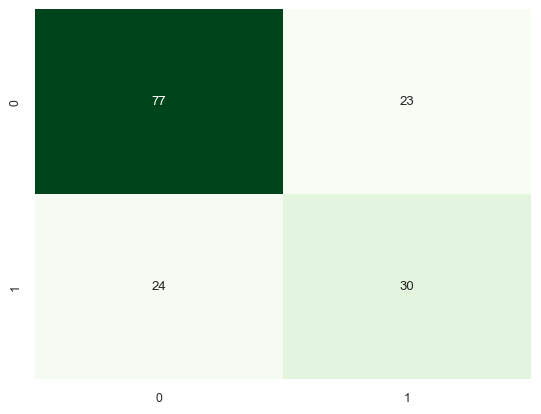

In [21]:
from sklearn.tree import DecisionTreeClassifier

print ("\n--- DecisionTreeClassifier ---")
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(train_scaled, y_train)

pred_dt = dt.predict(test_scaled)
print(accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

cm_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

In [51]:
X_data = data['BMI']
y_data = data['Glucose']

In [52]:
train_input, test_input, train_target, test_target = train_test_split(
    X_data, y_data, test_size=0.2, random_state = 42)

In [53]:
train_input = train_input.values.reshape(-1,1)
test_input = test_input.values.reshape(-1,1)
train_input.shape

(614, 1)

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [55]:
X_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: BMI
Non-Null Count  Dtype  
--------------  -----  
768 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [56]:
print ("==================================")
print (" ACCURACY OF OTHER ML REGRESSION" )
print ("==================================")

 ACCURACY OF OTHER ML REGRESSION


In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, train_target)

from sklearn.metrics import mean_squared_error, r2_score

lr_preds = lr.predict(test_scaled)
mse = np.sqrt(mean_squared_error(lr_preds, y_test))
print('평균제곱근오차', mse)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, lr_preds):.3f}')

평균제곱근오차 120.75887297288037
MSE : 120.759, RMSE: 10.989
Variance score : -64044.082


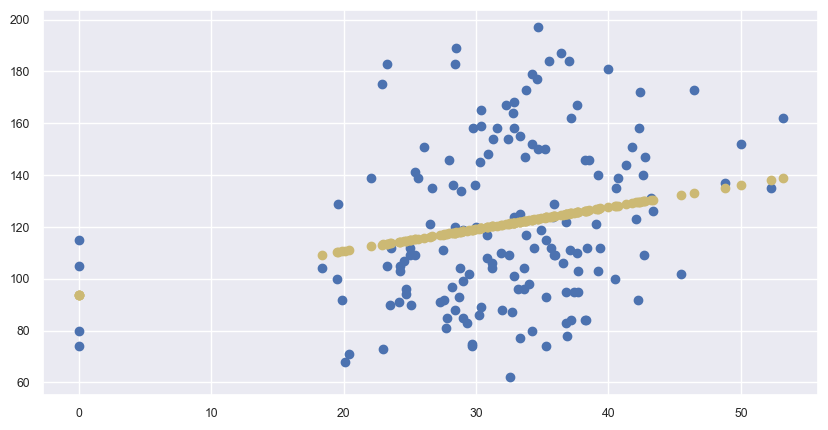

In [66]:
plt.figure(figsize=(10,5))
plt.scatter(test_input, test_target, label='y_test')
plt.scatter(test_input, lr_preds, c='y', label='lr_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [72]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train_scaled, train_target)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(test_scaled)

mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 120.86259183798258


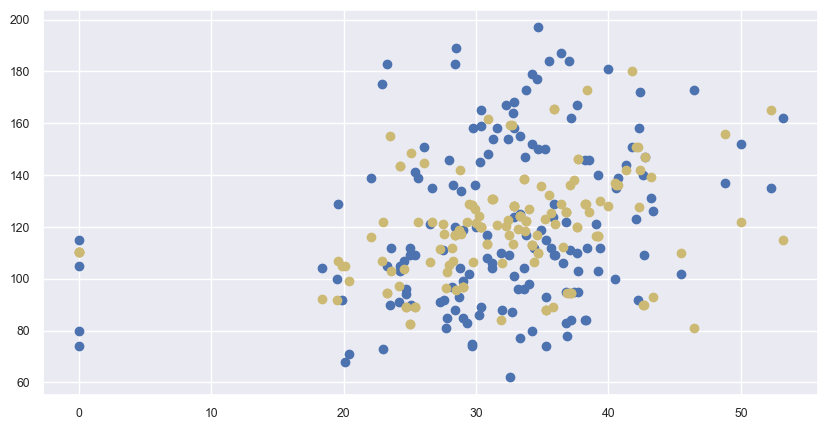

In [73]:
plt.figure(figsize=(10,5))
plt.scatter(test_input, test_target, label='y_test')
plt.scatter(test_input, dy_preds, c='y', label='dy_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [74]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(train_scaled, train_target)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(test_scaled)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 120.95149662006847


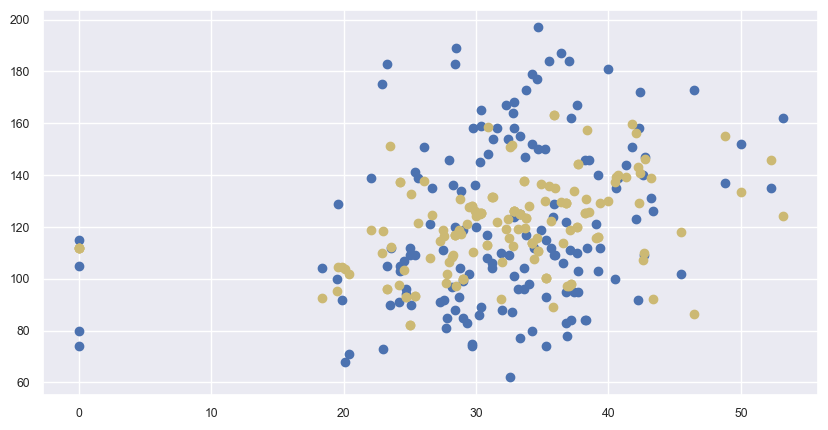

In [79]:
plt.figure(figsize=(10,5))
plt.scatter(test_input, test_target, label='y_test')
plt.scatter(test_input, ry_preds, c='y', label='ry_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [81]:
from sklearn import svm

model.fit(train_scaled, train_target)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(test_scaled)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 120.88894413847142


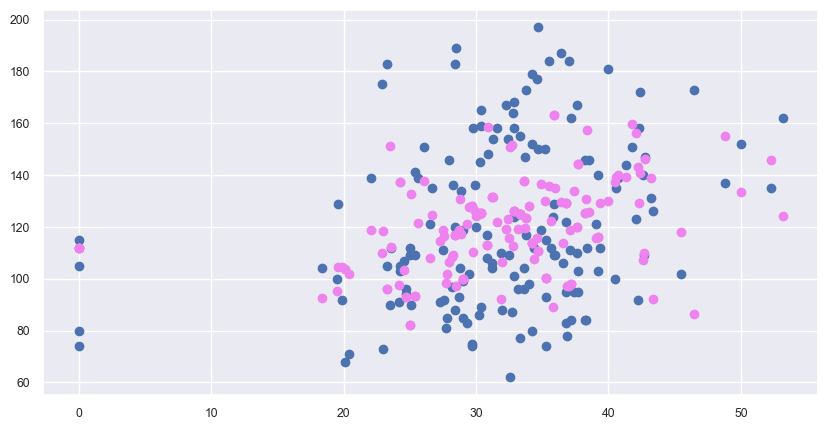

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(test_input, test_target, label='y_test')
plt.scatter(test_input, ry_preds, c='violet', label='sy_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         